In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dtypes = {
    'Name': str,
    'Sex': str,
    'Event': str,
    'Equipment': str,
    'Age': float,
    'AgeClass': str,
    'Division': str,
    'BodyweightKg': float,
    'WeightClassKg': str,
    'Squat1Kg': float,
    'Squat2Kg': float,
    'Squat3Kg': float,
    'Squat4Kg': float,
    'Best3SquatKg': float,
    'Bench1Kg': float,
    'Bench2Kg': float,
    'Bench3Kg': float,
    'Bench4Kg': float,
    'Best3BenchKg': float,
    'Deadlift1Kg': float,
    'Deadlift2Kg': float,
    'Deadlift3Kg': float,
    'Deadlift4Kg': float,
    'Best3DeadliftKg': float,
    'TotalKg': float,
    'Place': str,
    'Wilks': float,
    'McCulloch': float,
    'Glossbrenner': float,
    'IPFPoints': float,
    'Tested': str,
    'Country': str,
    'Federation': str,
    'Date': str,
    'MeetCountry': str,
    'MeetState': str,
    'MeetName': str
}

# Read the CSV file with the specified data types
df = pd.read_csv('openpowerlifting.csv', dtype=dtypes)
df

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423349,Marian Cafalik,M,SBD,Raw,60.5,60-64,Masters 2,73.5,74,160.0,...,438.27,316.52,469.67,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423350,Marian Piwowarczyk,M,SBD,Raw,55.5,55-59,Masters 2,63.5,66,90.0,...,372.60,295.66,423.03,Yes,Poland,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423351,Andrzej Bryniarski,M,SBD,Raw,62.5,60-64,Masters 2,94.4,105,140.0,...,382.36,264.22,378.84,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup
1423352,Stanisław Goroczko,M,SBD,Raw,63.5,60-64,Masters 2,80.8,83,-165.0,...,NaN,NaN,NaN,Yes,NaN,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup


In [3]:
df = df[df['Event'] == 'SBD']
df = df[df['Equipment'] == 'Single-ply']

# Calculate the z-scores for the BodyweightKg column
z_scores = np.abs((df['BodyweightKg'] - df['BodyweightKg'].mean()) / df['BodyweightKg'].std())

# Define a threshold value for outlier detection (e.g., z-score greater than 3)
threshold = 2

# Filter the DataFrame to exclude rows with outliers in the BodyweightKg column
df = df[z_scores <= threshold]
len(df)

624607

In [4]:
df['BodyweightKg'].mean()

79.01143904887391

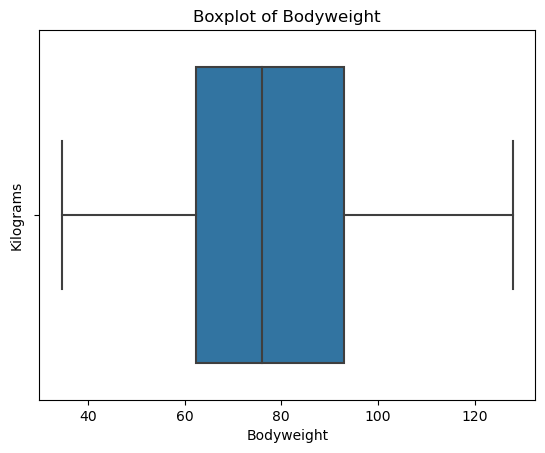

In [5]:
import seaborn as sns

# Create a boxplot using seaborn
sns.boxplot(x=df['BodyweightKg'])

# Set the title and labels for the boxplot
plt.title('Boxplot of Bodyweight')
plt.xlabel('Bodyweight')
plt.ylabel('Kilograms')

# Display the plot
plt.show()

In [6]:
# Convert 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Create 'Year' column
df['Year'] = df['Date'].dt.year

# Group by 'Year' and select distinct countries for each year
grouped_df = df.groupby('Year')['Country'].unique()

# Print the distinct countries for each year
for year, countries in grouped_df.items():
    print(f"Year {year}: {len(countries)}")

Year 1977: 14
Year 1978: 21
Year 1979: 26
Year 1980: 29
Year 1981: 29
Year 1982: 30
Year 1983: 33
Year 1984: 33
Year 1985: 30
Year 1986: 34
Year 1987: 39
Year 1988: 42
Year 1989: 43
Year 1990: 44
Year 1991: 50
Year 1992: 47
Year 1993: 51
Year 1994: 50
Year 1995: 58
Year 1996: 57
Year 1997: 54
Year 1998: 61
Year 1999: 62
Year 2000: 59
Year 2001: 54
Year 2002: 63
Year 2003: 69
Year 2004: 70
Year 2005: 72
Year 2006: 78
Year 2007: 80
Year 2008: 78
Year 2009: 73
Year 2010: 84
Year 2011: 81
Year 2012: 76
Year 2013: 75
Year 2014: 70
Year 2015: 75
Year 2016: 73
Year 2017: 77
Year 2018: 77
Year 2019: 47


In [7]:
# Drop rows where age is below 15
df = df.drop(df[df['Age'] < 15].index)

# Reset the index
df = df.reset_index(drop=True)

In [8]:
years = [1990, 2000, 2010, 2018]

for year in years:
    filtered_df = df[df['Year'] == year]
    grouped_df = filtered_df.groupby(['Age', 'Sex']).size().unstack('Sex', fill_value=0)
    
    grouped_df.reset_index(inplace=True)
    
    grouped_df['F'] = -grouped_df['F']
    grouped_df.rename(columns={'M': 'Men', 'F': "Women"}, inplace=True)
    grouped_df = grouped_df.sort_values(by='Age')
    
    # Define the age intervals
    age_intervals = range(15, 85, 5)

    # Create a new column 'AgeGroup' with the age intervals
    grouped_df['AgeGroup'] = pd.cut(grouped_df['Age'], bins=age_intervals)

    # Group the DataFrame by 'AgeGroup' and perform desired operations
    grouped_df = grouped_df.groupby('AgeGroup').agg({'Men': 'sum', 'Women': 'sum'})

    filename = f'data_{year}.csv'
    grouped_df.to_csv(filename)

In [9]:
grouped_df = df.groupby('Country').size()

# Save the grouped DataFrame to a CSV file
grouped_df.to_csv('by_country.csv', header=['Count'])

In [10]:
df.to_csv('all.csv')

In [11]:
grouped_df = df.groupby(['Year', 'Country']).agg({'Name': 'count', 'TotalKg': 'max'})

# Rename the 'Name' column to 'Count'
grouped_df.rename(columns={'Name': 'Count'}, inplace=True)

z_scores = np.abs((grouped_df['TotalKg'] - grouped_df['TotalKg'].mean()) / grouped_df['TotalKg'].std())

# Define a threshold value for outlier detection (e.g., z-score greater than 3)
threshold = 3

# Filter the DataFrame to exclude rows with outliers in the 'TotalKg' column
filtered_df = grouped_df[z_scores <= threshold]

filtered_df.to_csv('punctioation_by_country.csv')

In [12]:

grouped_df = df.groupby(['Year', 'Sex']).agg({'Name': 'count', 'Best3SquatKg': 'max', 'Best3BenchKg': 'max', 'Best3DeadliftKg': 'max'})

# Rename the 'Name' column to 'Count'
grouped_df.rename(columns={'Name': 'Count'}, inplace=True)

grouped_df.reset_index(inplace=True)

columns_to_melt = ['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']

# Reshape the DataFrame by melting the columns into rows
melted_df = pd.melt(grouped_df, id_vars=['Year', 'Count', 'Sex'], value_vars=columns_to_melt, var_name='KG_Variable', value_name='KG_Value')

# Create a unique key by concatenating 'KG_Variable' and 'Sex'
melted_df['Exercici'] = melted_df['KG_Variable'] + ' (' + melted_df['Sex'] + ')'


melted_df.to_csv('punctioation_by_ex_sex.csv')

In [19]:
grouped_df = df.groupby(['Year', 'Sex']).size().reset_index(name='Count')

# Reshape the DataFrame using pivot_table
pivoted_df = grouped_df.pivot(index='Year', columns='Sex', values='Count').fillna(0)

# Save the pivoted DataFrame to a CSV file
pivoted_df.to_csv('sex_evo.csv')


In [25]:
name_counts = df['Name'].value_counts()

# Retrieve the top 50 most frequent names
name_counts.head(10)

Jose Hernandez     177
Karel Ruso         134
Jackie Blasbery    112
Jose Rodriguez     111
Max Bristow        110
Libor Novák        101
Erik Rasmussen      93
Jenny Hunter        90
Kári Elíson         89
Zbyněk Krejča       88
Name: Name, dtype: int64

In [29]:
columns_to_include = ['Year', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']

# Filter the DataFrame for 'Jose Hernandez'
jose_df = df[df['Name'] == 'Jose Hernandez'][columns_to_include]
melted_df = jose_df.melt(id_vars='Year', value_vars=['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg'],
                         var_name='Exercise', value_name='Weight')

# Save the melted DataFrame to a CSV file
melted_df.to_csv('jose.csv', index=False)

# Filter the DataFrame for 'Jose Hernandez'
jose_df = df[df['Name'] == 'Jackie Blasbery'][columns_to_include]
melted_df = jose_df.melt(id_vars='Year', value_vars=['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg'],
                         var_name='Exercise', value_name='Weight')

# Save the melted DataFrame to a CSV file
melted_df.to_csv('jackie.csv', index=False)